In [1]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


# Importing dependencies

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [6]:
!pip install scikit-optimize

# Data collection and processing

In [9]:
df = pd.read_csv("car_prices.csv")

In [11]:
# checking no. of missing values
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [13]:
df.fillna({'transmission': 'automatic'}, inplace=True)

In [15]:
df['transmission'] = df['transmission'].fillna('automatic')

In [17]:
# Dropping rows with null values
df = df.dropna(subset=['vin', 'state','make', 'model', 'trim','body','condition','odometer','color','interior','mmr'])

In [19]:
df.shape

(533648, 16)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533648 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          533648 non-null  int64  
 1   make          533648 non-null  object 
 2   model         533648 non-null  object 
 3   trim          533648 non-null  object 
 4   body          533648 non-null  object 
 5   transmission  533648 non-null  object 
 6   vin           533648 non-null  object 
 7   state         533648 non-null  object 
 8   condition     533648 non-null  float64
 9   odometer      533648 non-null  float64
 10  color         533648 non-null  object 
 11  interior      533648 non-null  object 
 12  seller        533648 non-null  object 
 13  mmr           533648 non-null  float64
 14  sellingprice  533648 non-null  float64
 15  saledate      533648 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 69.2+ MB


In [23]:
# Selecting categorical columns 
categorical_columns = ['make','model','trim','body','state','color','interior','seller']

In [25]:
# Selecting numerical columns
numerical_columns = ['year', 'odometer']

In [27]:
#listing and dropping columns that are less related to the target
cols_to_drop = ['transmission','vin','sellingprice','saledate']

df1 = df.drop(cols_to_drop, axis=1)

In [29]:
from category_encoders import TargetEncoder

# Creating a copy of the dataframe
df_encoded = df1.copy()

# Applying Target Encoding
encoder = TargetEncoder(cols=categorical_columns)
df_encoded[categorical_columns] = encoder.fit_transform(df_encoded[categorical_columns], df_encoded['mmr'])


In [35]:
# Computing the correlation matrix
print(df_encoded.dtypes)

# Computing the correlation matrix
correlation_matrix = df_encoded.corr(method='pearson')

year           int64
make         float64
model        float64
trim         float64
body         float64
state        float64
condition    float64
odometer     float64
color        float64
interior     float64
seller       float64
mmr          float64
dtype: object


In [37]:
import seaborn as sns

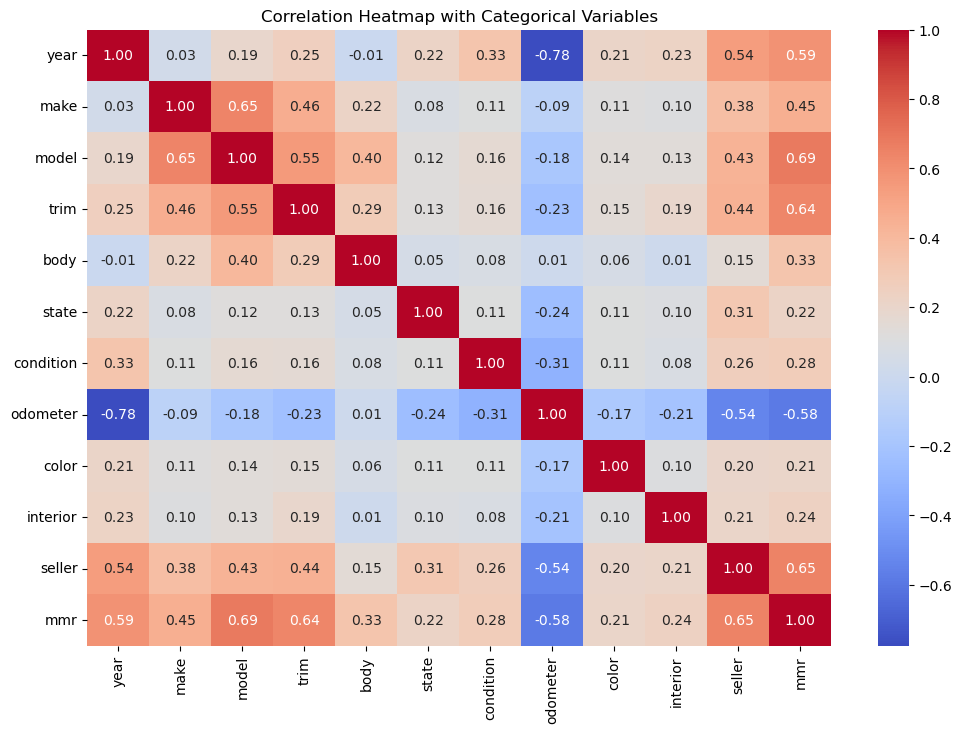

In [39]:
# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap with Categorical Variables")
plt.show()

In [41]:
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [43]:
df1.head()

,year,make,model,trim,body,state,condition,odometer,color,interior,seller,mmr
0,2015,Kia,Sorento,LX,SUV,ca,5.0,16639.0,white,black,kia motors america inc,20500.0
1,2015,Kia,Sorento,LX,SUV,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0
2,2014,BMW,3 Series,328i SULEV,Sedan,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0
3,2015,Volvo,S60,T5,Sedan,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0


In [45]:
print(df1.columns)

Index(['year', 'make', 'model', 'trim', 'body', 'state', 'condition',
       'odometer', 'color', 'interior', 'seller', 'mmr'],
      dtype='object')


In [47]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 533648 entries, 0 to 558836
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       533648 non-null  int64  
 1   make       533648 non-null  object 
 2   model      533648 non-null  object 
 3   trim       533648 non-null  object 
 4   body       533648 non-null  object 
 5   state      533648 non-null  object 
 6   condition  533648 non-null  float64
 7   odometer   533648 non-null  float64
 8   color      533648 non-null  object 
 9   interior   533648 non-null  object 
 10  seller     533648 non-null  object 
 11  mmr        533648 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 52.9+ MB
None


In [49]:
if 'mmr' in df1.columns:
    print("'mmr' is present in the DataFrame.")
else:
    print("'mmr' is NOT present in the DataFrame.")


'mmr' is present in the DataFrame.


In [51]:
df1.isnull().sum()

year         0
make         0
model        0
trim         0
body         0
state        0
condition    0
odometer     0
color        0
interior     0
seller       0
mmr          0
dtype: int64

In [53]:
# Checking for duplicates
num_duplicates = df1.duplicated().sum()
print(f'Number of duplicate rows: {num_duplicates}')

Number of duplicate rows: 1


In [55]:
# Dropping duplicates
df1.drop_duplicates(inplace=True)

# Boxplots

In [58]:
Q1 = df1['mmr'].quantile(0.25)
Q3 = df1['mmr'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df1[(df1['mmr'] < lower_bound) | (df1['mmr'] > upper_bound)]

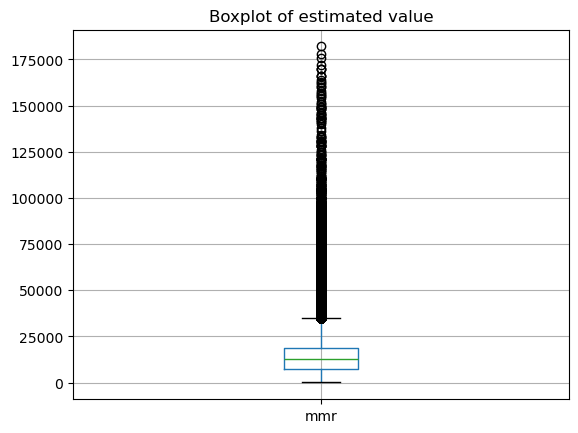

In [60]:
df1[['mmr']].boxplot()
plt.title('Boxplot of estimated value')
plt.show()

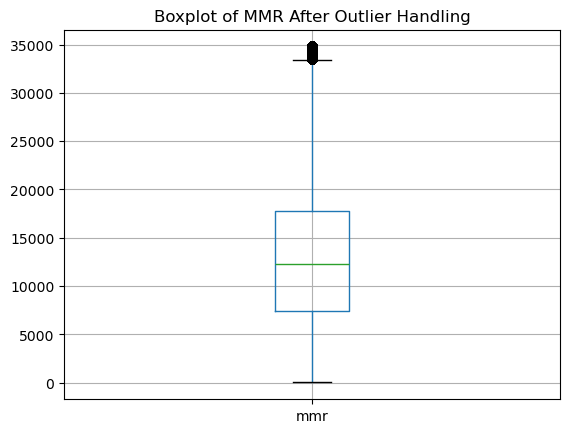

In [62]:
df1 = df1[(df1['mmr'] >= lower_bound) & (df1['mmr'] <= upper_bound)]

df1[['mmr']].boxplot()
plt.title('Boxplot of MMR After Outlier Handling')
plt.show()

In [64]:
display(df1['mmr'])

0         20500.0
1         20800.0
2         31900.0
3         27500.0
5         15350.0
           ...   
558831    20300.0
558833    30200.0
558834    29800.0
558835    15100.0
558836    29600.0
Name: mmr, Length: 517499, dtype: float64

In [66]:
# Scaling for numerical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler(with_mean=False))  
])

In [68]:
# one-hot encoding for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')) 
])

In [70]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),  
        ('cat', categorical_transformer, categorical_columns)  
    ])

In [72]:
print("Categorical features:", categorical_columns)

Categorical features: ['make', 'model', 'trim', 'body', 'state', 'color', 'interior', 'seller']


In [74]:
print("Numeric features:", numerical_columns)

Numeric features: ['year', 'odometer']


In [76]:
vehicle_data_sample = df1.sample(frac=0.02, random_state=8)

In [78]:
vehicle_data_sample.shape

(10350, 12)

In [80]:
#Splitting to training and testing data
x = vehicle_data_sample.drop(columns = 'mmr')
y = vehicle_data_sample['mmr']

In [82]:
print("Shape of X:", x.shape)
print("Shape of y:", y.shape)

Shape of X: (10350, 11)
Shape of y: (10350,)


In [84]:
print("Missing values in X:", x.isnull().sum())
print("Missing values in y:", y.isnull().sum())

Missing values in X: year         0
make         0
model        0
trim         0
body         0
state        0
condition    0
odometer     0
color        0
interior     0
seller       0
dtype: int64
Missing values in y: 0


In [86]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=8)

In [88]:
print("Missing values in X_train:", X_train.isnull().sum().sum())

Missing values in X_train: 0


In [90]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', 'passthrough', numerical_columns),
            ('cat', TargetEncoder(cols=categorical_columns), categorical_columns)
        ],
        remainder='drop'  # Drop any columns not specified 
    )),
    ('regressor', Lasso())
])

In [92]:
print(X_train.columns)

Index(['year', 'make', 'model', 'trim', 'body', 'state', 'condition',
       'odometer', 'color', 'interior', 'seller'],
      dtype='object')


In [94]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['year', 'odometer']),
                                                 ('cat',
                                                  TargetEncoder(cols=['make',
                                                                      'model',
                                                                      'trim',
                                                                      'body',
                                                                      'state',
                                                                      'color',
                                                                      'interior',
                                                                      'seller']),
                                                  ['make', 'model', 'trim',
                                                   'body', 'state', 'color',
                                                   'interior', 'seller'])])),
                ('regressor', Lasso())])

In [96]:
y_pred_linear = model_pipeline.predict(X_test)

In [100]:
#MSE and R Squarred
print("Lasso Regression Performance:")
print("MSE:", mean_squared_error(y_test, y_pred_linear))
print("R²:", r2_score(y_test, y_pred_linear))
print("MAE:", mean_absolute_error(y_test, y_pred_linear))

Lasso Regression Performance:
MSE: 14547344.064297337
R²: 0.7428007265734053
MAE: 2767.3762051665335


In [102]:
# Testing
new_data = pd.DataFrame({
    'year': [2015, 2019],
    'make': ['Toyota', 'KIA'],
    'model': ['Camry', 'FZ'],
    'trim': ['LE', 'EX'],
    'body': ['Sedan', 'Sedan'],
    'transmission': ['Automatic', 'Manual'],
    'vin': ['1HGBH41JXMN109186', '1HGCM82633A123456'],  # will be dropped
    'state': ['CA', 'NY'],  # will be dropped
    'condition': ['Good', 'Excellent'],
    'odometer': [15000, 30000],
    'color': ['Blue', 'Red'],
    'interior': ['Gray', 'Black'],
    'seller': ['Dealer', 'Private'],
    'mmr': [15000, 18000],
    'saledate': ['2024-01-01', '2024-01-02']  # will be dropped
})

# Dropping columns that are not needed for prediction
new_data_preprocessed = new_data.drop(columns=['vin', 'state', 'saledate'])


# Ensuring new data has the same columns as expected by the pipeline
missing_columns = set(categorical_columns) - set(new_data_preprocessed.columns)

for col in missing_columns:
    new_data_preprocessed[col] = 'Unknown'  

# Making predictions
predictions = model_pipeline.predict(new_data_preprocessed)

# Converting predictions to a DataFrame for easier viewing
predictions_df = pd.DataFrame(predictions, columns=['PredictedSellingPrice'])

print(predictions_df)

   PredictedSellingPrice
0           14648.585847
1           17221.497087


In [104]:
import joblib

In [106]:
# Save the trained model pipeline
joblib.dump(model_pipeline, 'model_pipeline_lasso.pkl')

['model_pipeline_lasso.pkl']